# 1조(황상욱, 박세지, 현세민, 김지원, 최종엽) - 전체코드 정리

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# matplotlib의 한글문제를 해결
from matplotlib import font_manager, rc 
%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # font_name


os.getcwd() # ***  경로확인 필수!! ***
os.chdir('C:/Users/4/Bdata') # *** 경로설정(자신의 경로에 맞게 설정) ***


#  < 60세 이상 인구증가 추이 > 

C:\Users\4\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, '60세 이상 인구 증가 추이')

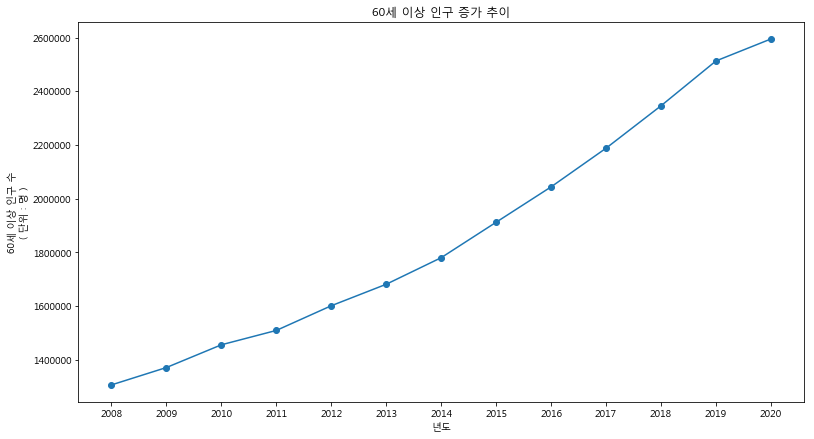

In [2]:
#  < 60세 이상 인구증가 추이 > 

# 1.데이터 불러오기
age = pd.read_csv('주민등록인구집계현황.csv', sep=',', encoding='euc-kr')
 
# 2.공백제거필요 -> '경기도    ' 이러한 부분이 있으므로
age['행정구역명'] = age['행정구역명'].str.strip() 

# 3.경기도 총합 부분 추출(구역별로 나눠져 있는 부분을 제외시키기 위해)
age1 = age[age.행정구역명 == '경기도']

# 4.연도,월, 60세이상
o_age = age1.iloc[:,[0,1,11,12,13,14,15]]

# y_age = age1.iloc[:,[0,1,5,6,7,8]] # 유아, 청년층
# m_age = age1.iloc[:,[0,1,9,10]] # 중년층

# 5. 60세이상인구 합계
o_age['60세이상'] = o_age.iloc[:,2:].sum(1)

# 6. 년도별 60세이상인구 합계 추출
# 2008~2019년이 12월인 이유: 1~12월 누적데이터 이므로 각 년도별 최신 데이터인 12월을 추출
# 2020년이 5월인 이유: 2020년은 5월이 최신데이터

o_age1 = o_age[o_age['월'] == 12]  # 2008 ~2019
plus = pd.DataFrame([o_age[o_age['연도'] == 2020].iloc[0,:]])  # 2020(DataFrame형태 맞추기)

# 7. 2008~2019년의 각 12월과 2020년 5월 데이터 병합
o_age2 = pd.concat([o_age1, plus],ignore_index=True,axis=0)
# o_age2.sort_values('연도')


# 8. 년도별 정렬
o_age3 = o_age2.iloc[:,[0,-1]].sort_values('연도')

# 9. 그래프그리기 x,y 축 설정
x_val = o_age3['연도']
y_val = o_age3['60세이상']
 
# 10. 그래프 그리기

x_val = o_age3['연도']
y_val = o_age3['60세이상']

plt.rcParams['figure.figsize'] = [13, 7] # 그래프 크기(figure) 사이즈 조정
plt.plot(x_val, y_val, marker = 'o')
plt.xlabel('년도')
plt.xticks(np.arange(2008, 2021, step=1))  # x축 전체 표시
plt.ylabel('60세 이상 인구 수\n( 단위 : 명 )')
plt.title('60세 이상 인구 증가 추이')

In [ ]:
############################################################################################################################

# < 시군별 기관 수 >

In [10]:
# < 시군별 기관 수 >

# 1. 데이터 불러오기
jumin = pd.read_csv('주민등록인구집계현황.csv', sep=',', encoding='euc-kr')
n_d = pd.read_csv('노인돌봄서비스수행기관현황.csv', sep=',', encoding='euc-kr')
n_g = pd.read_csv('노인여가복지시설현황(경로당).csv', sep=',', encoding='euc-kr')
n_b = pd.read_csv('노인여가복지시설현황(노인복지관).csv', sep=',', encoding='euc-kr')
n_m = pd.read_csv('무한돌봄센터현황.csv', sep=',', encoding='euc-kr')
n_j = pd.read_csv('재가노인복지시설현황.csv', sep=',', encoding='euc-kr')

# 2. 시군구별 센터 수 파악
n_d_count = n_d.groupby('시군명')['서비스구분명'].count() # 시군구별 노인돌봄기관 센터 수

n_g_count = n_g.groupby('시군명')['시설명'].count() # 시군구별 경로당 수

# n_b
n_b_count = n_b.groupby('시군명')['시설명'].count() # 시군구별 노인복지관 수
n_b_count

# n_m.head()
n_m_count = n_m.groupby('시군명')['센터명'].count() # 시군구별 무한돌봄센터 수
n_m_count

# n_j.head()
n_j_count = n_j.groupby('시군구명')['시설명'].count() # 시군구별 재가노인복지시설 수
n_j_count.index = n_j_count.index.str.split(' ').str[0]
n_j_count = n_j_count.groupby('시군구명').count()
# n_j_count

# 3. 데이터 합치기
md1 = pd.merge(n_d_count,n_g_count,how='outer', left_index=True,right_index=True)
md2 = pd.merge(md1,n_b_count,how='outer', left_index=True,right_index=True)
md3 = pd.merge(md2,n_m_count,how='outer', left_index=True,right_index=True)
md4 = pd.merge(md3,n_j_count,how='outer', left_index=True,right_index=True)
md4

# 4. 컬럼명 변경 
md5 = md4.rename(columns = {'서비스구분명':'돌봄서비스기관', '시설명_x':'경로당','시설명_y':'노인복지관',
                            '센터명':'무한돌봄센터','시설명':'재가노인복지시설'})

# 5. 결측치 처리
md5
md6 = md5.fillna(0)

# 6. 시군별 노인복지시설 수(final) 
md6

# 7. dtypes 통일
md6['노인복지관'] = md6['노인복지관'].astype('int64')
md6

,돌봄서비스기관,경로당,노인복지관,무한돌봄센터,재가노인복지시설
시군명,,,,,
가평군,7,164,1,1,1
고양시,18,553,3,1,2
과천시,2,27,1,1,1
광명시,7,116,1,1,1
광주시,16,276,1,1,1
구리시,12,126,0,1,1
군포시,14,114,2,1,1
김포시,13,319,2,1,1
남양주시,11,515,3,1,1


In [ ]:
############################################################################################################################

# < 연도별 12월 인구수 >

In [4]:
# < 연도별 12월 인구수 >
# 누적인구이므로 각 연도별 12월을 추출함

# 1. 경기도 인구수 csv파일 불러오기
df = pd.read_csv('주민등록인구집계현황.csv', encoding='cp949') # encodimg='utf-8' 하면 에러가 나기 때문에 cp949를 해줘야 함
df.head()

# 2. 원하는 열만 가져와서 df 다시 만들기
df_test = df[['연도','월','행정구역구분명','행정구역명','총 인구수','0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70~79세','80~89세','90~99세',]]
df_test

# 3. df에서 행정구역 구분명을 통해 '도' 또는 '시군' 만 가져와서 인구수 확인
df_do = df_test[ (df_test['행정구역구분명']=='도') | (df_test['행정구역구분명']=='시군') ]
df_do

# 4. 각 연도별 12월달의 인구수를 확인
df_year = df_do[ (df_do['연도']==2020) & (df_do['월']== 5) ]
df_year

# 5. 연도를 set으로  만들어서 같은 값들을 제거하고 다시 list 형식으로 바꾸어 year에 저장
year = list(set(df_do['연도']))

# 6. 2020년은 5월 까지 밖에 없어서 for문과 if를 통해 excel 파일로 저장
for i in year:
    try:
        print(i)
        if i != 2020:
            df_year = df_do[(df_do['연도']== i) & (df_do['월'] == 12)]
        else :
            df_year = df_do[(df_do['연도']== i) & (df_do['월'] == 5)]
            
        df_year.to_excel('result_{}.xlsx'.format(i), index=False, encoding='cp949')
        print('파일저장 완료')
    except:
        print('실패')

2016
파일저장 완료
2017
파일저장 완료
2018
파일저장 완료
2019
파일저장 완료
2020
파일저장 완료
2008
파일저장 완료
2009
파일저장 완료
2010
파일저장 완료
2011
파일저장 완료
2012
파일저장 완료
2013
파일저장 완료
2014
파일저장 완료
2015
파일저장 완료


In [ ]:
############################################################################################################################

# < 히트맵 >

C:\Users\4\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\4\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


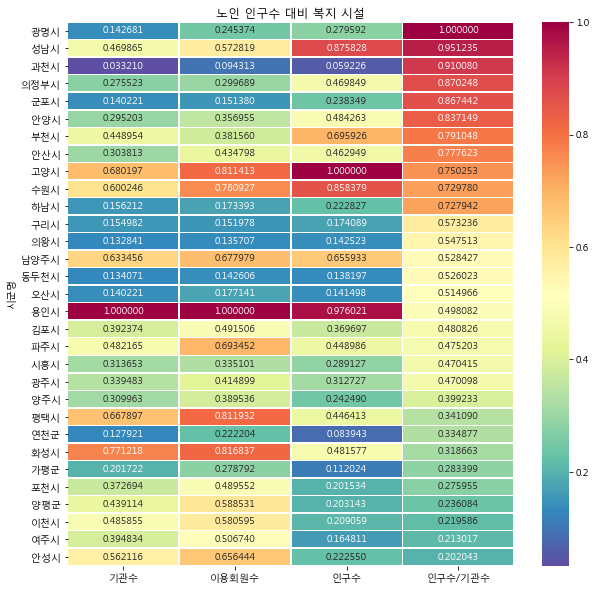

In [12]:
# < 히트맵 >
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # rc == run configure(configuration file)
import os
os.chdir('C:/Users/4/Bdata')
%matplotlib inline

# df_1 : 노인여가복지시설(경로당)

# 1. 파일 읽기
df_1 = pd.read_csv('노인여가복지시설현황(경로당).csv', encoding='cp949')
df_1.head()

# 2. '시군명'과 '이용회원수'만 가져오기
df_new = df_1[['시군명', '이용회원수']]

# 3. '기관수' 행을 추가하고 1로 설정
df_new['기관수']=1

# 4. '시군명'을 기준으로 합계 계산
pivot_df = pd.pivot_table(df_new, index='시군명', aggfunc=sum)

# 5. 파일 읽기 - 노인인구수 테이블 / df_3: 노인 인구수
df_3 = pd.read_excel('result_노인인구수_2020.xlsx', encoding='cp949')
df_3.head()
df_3 = df_3.drop([0])

# 6.'행정구역명'과 '70세'이상인 열만 가져오기
pivot_df2 = df_3[['행정구역명' ,'70~79세', '80~89세', '90~99세']]

# 7. 행을 기준으로 합계 구하고 열 추가
# 70+이상의 노인 인구수의 합계 구하기
pivot_df2['Total'] = pivot_df2.sum(axis=1)
pivot_df2 = pivot_df2[['행정구역명' , 'Total']]

# 8. pivot_df2(인구수)의 'Total' 열을 pivot_df(시설수와 이용자수)에 복사하기
# 'Total' 열의 값을 리스트로 저장
totalli = pivot_df2.Total.tolist()
pivot_df['인구수'] = totalli

# 9. 비율로 나누기 (인구수/기관수)
# '인구수'열을 '기관수'열로 나눈 리스트를 pivot_df에 저장
divDF = pivot_df['인구수'] / pivot_df['기관수']
pivot_df['인구수/기관수'] = list(divDF)

# 10. max값으로 나눠주기
weight_col = pivot_df[['기관수', '이용회원수', '인구수','인구수/기관수']].max()
finalDF= pivot_df[['기관수', '이용회원수', '인구수', '인구수/기관수']] / weight_col
finalDF

# 11. HEATMAP 만들기
import seaborn as sns
%matplotlib inline 
from matplotlib import font_manager, rc # rc == run configure(configuration file)

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize = (10, 10))

# cmap : matplotlib colormap @ https://goo.gl/YWpBES
sns.heatmap(finalDF.sort_values(by='인구수/기관수', ascending=False), 
            annot=True, fmt='f', linewidths=.5, cmap='Spectral_r')

plt.title('노인 인구수 대비 복지 시설')
plt.show()

In [ ]:
############################################################################################################################

# <텍스트 마이닝 >

In [3]:
# <텍스트 마이닝 >
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time # 코드 쉬는 시간
import re # 정규표현식 : regular expression
import numpy as np
import nltk


In [4]:
# 1. 크롤링을 위한 함수 생성
def main_crawling(query, start_date, end_date, sort_type, max_page):
 
# 여백으로 작성시
    if query == '':
        query = '보람튜브'
    if len(start_date) != 10:
        start_date = '2019.07.28'
    if len(end_date) != 10:
        end_date = '2019.07.29'
    if sort_type not in ['0', '1', '2']:
        sort_type = '0'
#     if max_page == '':
#         max_page = 5


    # 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
    titles = []
    dates = []
    articles = []
    article_urls = []
    press_companies = []

    # 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
    start_date = start_date.replace(".", "")
    end_date = end_date.replace(".", "")

    # 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
    current_call = 1
    last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 


    while current_call <= last_call:

        print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))

        url = "https://search.naver.com/search.naver?where=news&query=" + query \
              + "&sort=" + sort_type \
              + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
              + "to" + end_date \
              + "%2Ca%3A&start=" + str(current_call)

        urls_list = []
        try: # 네이버 뉴스 검색결과 페이지 자체에 접근이 불가능할 경우 에러가 발생할 수 있습니다.
            web = requests.get(url).content
            source = BeautifulSoup(web, 'html.parser')

            for urls in source.find_all('a', {'class' : "_sp_each_url"}):
                if urls["href"].startswith("https://news.naver.com"):
                    urls_list.append(urls["href"])
        except:
            print('해당 뉴스 검색 페이지의 네이버 뉴스 링크를 모으는 중 에러가 발생했습니다. : ', url)
        
        if urls_list != []:
            for url in urls_list:
                try: # 특정 뉴스 기사글 하나를 크롤링하는 중 에러가 발생할 수 있습니다.ㄴ
                    web_news = requests.get(url).content
                    source_news = BeautifulSoup(web_news, 'html.parser')

                    title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
                    print('Processing article : {}'.format(title))

                    date = source_news.find('span', {'class' : 't11'}).get_text()

                    article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
                    article = article.replace("\n", "")
                    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
                    article = article.replace("동영상 뉴스       ", "")
                    article = article.strip()

                    press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()

                    titles.append(title)
                    dates.append(date)
                    articles.append(article)
                    press_companies.append(press_company)
                    article_urls.append(url)
                except:
                    print('\n*** {}번부터 {}번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.'.format(current_call, current_call+9))
                    print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        else:
            pass

        time.sleep(5)
        current_call += 10
            
            
    article_df = pd.DataFrame({'Title':titles, 
                               'Date':dates, 
                               'Article':articles, 
                               'URL':article_urls, 
                               'PressCompany':press_companies})

    article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
    
    print('\n크롤링이 성공적으로 완료되었습니다!')
    print('\n크롤링 결과를 다음 파일에 저장하였습니다 : {}'.format(datetime.now().strftime('%y%m%d_%H%M')))

In [5]:
# 2. 크롤링 실행 확인
query = '경기 노인 복지 시설 부족'
start_date = '2010.01.01'
end_date = '2020.07.17'
sort_type = '0'
max_page = '3'

if start_date > end_date:
    print('\n시작 날짜는 종료 날짜보다 이후로 지정하실 수 없습니다. 다시 실행해주세요!')
elif max_page == '':
    max_page = 5
    print('\n원하시는 페이지 수가 입력되지 않았습니다. 5 페이지까지만 크롤링을 진행합니다.')
    main_crawling(query, start_date, end_date, sort_type, max_page)
else:
    max_page = int(max_page)
    main_crawling(query, start_date, end_date, sort_type, max_page)


1번째 기사글부터 크롤링을 시작합니다.
Processing article : 경기도, 시·군에 노인의료복지시설 인권지킴이 운영계획 수립 요청
Processing article : 경기도, 시·군에 노인의료복지시설 인권지킴이 운영 요청
Processing article : '탁구장→교회→노인복지센터'…끊어지지 않는 수도권 연쇄감염(종합)
Processing article : 고양 노인복지관 ‘부족’, 장기요양시설 ‘과다’
Processing article : [기고]더 나은 노인복지 위해 무얼 해야 할까
Processing article : 경기북부 사회복지시설 부족…국비 지원 절실
Processing article : 감사원 “국도·지방도 터널, 화재 필수방재시설 부족”
Processing article : 감사원 "국도·지방도 터널, 화재 필수방재시설 부족"

11번째 기사글부터 크롤링을 시작합니다.
Processing article : 5명 중 1명이 70세 이상인 日… 노인 복지시설은 줄도산
Processing article : 경기북부 곳곳서 지자체 간 기피시설 갈등…'해법 없나'
Processing article : ‘사회적 혁신’ 이끌 청년들 “고령화·저출산·노인문제 실제로 접해보니…”
Processing article : [내가 만드는 복지국가] 사회복지시설 관리, 왜 이러나?
Processing article : 한화투자증권, 노인 요양시설서 사회공헌활동 실시
Processing article : 한화투자증권, 노인 요양시설서 봉사활동 실시

21번째 기사글부터 크롤링을 시작합니다.
Processing article : "연탄도, 분유도, 화장지도 부족"…연말 불우이웃돕기 찬바람(종합)
Processing article : 의정부시, 가능동에 '흥선노인복지센터' 개관

크롤링이 성공적으로 완료되었습니다!

크롤링 결과를 다음 파일에 저장하였습니다 : 200723_1032


In [6]:
# 3. 크롤링 데이터 가져오기
import nltk

df = pd.read_excel('result_200722_1442.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"경기도, 시·군에 노인의료복지시설 인권지킴이 운영계획 수립 요청",2020.06.25. 오전 9:07,활동비 지원·대상시설 50%까지 확대 운영 등경기도가 노인의료복지시설 입소자에 대한...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1
1,"경기도, 시·군에 노인의료복지시설 인권지킴이 운영 요청",2020.06.25. 오전 9:28,경기도가 노인의료복지시설 입소자에 대한 노인학대 예방 등 노인인권보호를 위해 도내 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,머니S
2,'탁구장→교회→노인복지센터'…끊어지지 않는 수도권 연쇄감염(종합),2020.06.09. 오후 3:38,"양천구 탁구장 확진자 총 51명…리치웨이는 68명""연쇄감염 고리 끊으려면 방역수칙 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,edaily
3,"고양 노인복지관 ‘부족’, 장기요양시설 ‘과다’",2020.01.08. 오전 1:05,고양시청 전경. 사진제공=고양시 [고양=파이낸셜뉴스 강근주 기자] 고양 노인인구 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,financial news
4,[기고]더 나은 노인복지 위해 무얼 해야 할까,2020.03.27. 오후 6:32,[나송 전주비전대학교 사회복지경영과 겸임교수]4·15 총선을 맞아 복지국가 실현을 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,노컷뉴스


In [7]:
# 시리즈.tolist()
articles = df['Article'].tolist()

len(articles)
articles[:2]

#str 만들기
articles = ''.join(articles) # 리스트의 아이템들을 특정한 문자를 기준으로 이어 붙이기
articles[:1000]

'활동비 지원·대상시설 50%까지 확대 운영 등경기도가 노인의료복지시설 입소자에 대한 노인학대 예방 등 노인인권보호를 위해 도내 31개 시·군에 자체 노인의료복지시설 인권지킴이 운영계획을 수립하도록 요청했다./경기도청사 © 뉴스1(경기=뉴스1) 진현권 기자 = 경기도는 노인의료복지시설 입소자에 대한 노인학대 예방 등 노인인권보호를 위해 도내 31개 시·군에 자체 노인의료복지시설 인권지킴이 운영계획을 수립하도록 요청했다고 25일 밝혔다.인권지킴이는 2014년 보건복지부 노인학대방지 종합대책으로 시설 입소 노인들의 인권보호 강화와 학대 예방을 위해 도입돼 지난해 기준 경기도 전체 노인의료복지시설 1705곳의 31%가량인 530곳에서 운영했다.시군에서는 주민들 중 인권지킴이를 선발해 관련 교육을 실시한 뒤 시설을 지정해 활동하게 하고 있다. 인권지킴이는 시설장, 종사자 등에 대한 인권모니터링, 시설 설비나 서비스에서 인권취약·침해부분에 대해 시정권고요청 등을 담당한다. 그러나 일부 시군에서는 인권지킴이를 두지 않는 등 인권지킴이에 대한 인식부족을 나타내는 사례가 발생했다. 또 활동비를 지급하는 부천·포천·성남 등 3개 시군의 인권지킴이 활동이 무보수(명예직) 운영 시군에 비해 실효성이 높아 활동비 예산 지원이 필요한 것으로 나타났다. 이에 도는 31개 시·군에 Δ인권지킴이에 대한 활동비 지원 Δ대상시설 50%까지 확대 운영 Δ지역 노인보호전문기관과 연계한 인권지킴이 교육이수 등 시군 여건에 따른 자체 인권지킴이 운영계획을 수립해 적극 운영할 것을 요청했다. 도는 각 시군의 협조를 얻어 인권지킴이 운영을 독려하고 이에 대한 이행여부를 계속해 점검해 나갈 예정이다. 조태훈 도 노인복지과장은 “노인 인권지킴이 활동이 시설 노인의 인권 의식 제고와 시설환경 개선에 효과적인 것으로 파악돼 지속적인 양적·질적 확대가 필요하다”며 “더 많은 시군에서 인권지킴이를 활용할 수 있도록 지원규정 마련을 관계부처에 건의하겠다”고 말했다.jhk102010@news1.kr▶ 네이버 메인에서

In [8]:
# 4. 품사태깅
from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged

ModuleNotFoundError: No module named 'konlpy'

In [ ]:
# 유의미한 의미를 갖고 있지 않은 단어를 제외할 수 있습니다.
del_list = ['따르다', '양주시', '경기', '서울', '경기도', '서울시', '사진', '지역', '증권', '지난해', '연탄','하다', '대한', '뉴스', '밝히다', '지킴', '활동', '입소', '회복', '지난', '받다','늘다', '위탁','기준' '하다', '기자', '위해', '수탁', '연합뉴스', '터널', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다', '백군기'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

In [ ]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

from collections import Counter
result = Counter(word_cleaned)
word_dic = dict(result)
word_dic

In [ ]:
# 5. 워드 클라우드
word_dic.items()
word_dic

# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬합니다.
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같습니다.

# ('보람', 517),
for word, count in sorted_word_dic[:23]:
    print("{0}({1})".format(word, count), end=" ")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install wordcloud 아래 wordcloud 실행이 안될시 주석을 풀고 실행해주세요

In [ ]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있습니다.
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [ ]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=20, # max words
                       width=2000, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)

In [ ]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

youtube_coloring = np.array(Image.open("images.jpg"))
image_colors = ImageColorGenerator(youtube_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=70,
                       width=2000, height=1000,  
                       mask=youtube_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
# plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.imshow(word_cloud.recolor(colormap='summer'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
############################################################################################################################

# < 복지시설 시각화 >

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc# rc == run configure(configuration file)
import googlemaps
import json
import folium

# 경기도 2020 노인 인구수 & 노인비율 데이터 @ 경기도 데이터드림
# 원본 데이터 및 전처리 작업을 위한 파이썬 코드 @ folder named [ Original data source & data preprocessing (5대범죄 & 인구수) ] 

old = pd.read_excel('경기도_노인인구수(통계청).xlsx', encoding='utf-8') 
#dataframe name = old
old.head(32)

In [ ]:
area_old = pd.pivot_table(old, index='행정구역', aggfunc=np.sum)
area_old.head()

In [ ]:
#노인인구 파일-행정구역에 경도와 위도 추가하기

gmaps = googlemaps.Client(key="발급받은 개인키 입력하세요") # -- input your key --

lat = []
lng = []

for name in old['행정구역']:
    # gmaps.reverse_geocode((longitude 값, latitude 값), language="ko") == 경도 & 위도 값으로 주소값 가져오기
    # gmaps.geocode('한글 주소', language="ko") 로 위도/경도, 우편번호까지 알 수 있음
    tmpMap = gmaps.geocode(name) # ex) 성남시
    tmpLoc = tmpMap[0].get('geometry') # 배열 형태( [~] )로 들어오기 때문에 [0]으로 호출
    lat.append(tmpLoc['location']['lat']) # dict(tmpLoc)의 데이터는 dict['key값'] 로 value 호출
    lng.append(tmpLoc['location']['lng'])
    
old['위도'] = lat
old['경도'] = lng

old.head()

In [ ]:
#columns(열) 순서 변경하기
old = old.reindex(columns=['행정구역','노인인구수','전체인구','노인인구비율','경도','위도'])
old

# # 새롭게 행 이름을 짓기
# sigu_df.rename(columns = {'인구수(명)':'노인인구수',
#                         '비율(%)':'노인비율'}, inplace=True) # inplace 옵션 == 덮어쓰기 여부
# sigu_df.head()

In [ ]:
# 인구수 기준으로 오름차순 정렬하기

# '노인인구수'을 기준으로 정렬할 때?
old.sort_values(by='노인인구수', ascending=False, inplace=True) # ascending=False : 내림차순, inplace=True : 덮어쓰기
old

In [ ]:
plt.figure(figsize=(12,8)) #size 조절 
plt.xticks(rotation = 50000) #x축 조절 
sns.barplot(data = old.sort_values(by='노인인구수', ascending=False), 
            x = "행정구역", 
            y = "노인인구수" ) 
plt.show()

In [ ]:
#한글데이터 시각화

# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)


# <지도 시각화>

In [ ]:
#!pip install folium==0.5.0

In [ ]:
# import warnings
# warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'Gyeonggi_municipalities-geo.json'
#경기도 행정구역만 정리된 json파일 불러오기
geo_str = json.load(open(geo_path, encoding='utf-8'))

geo_str['features'][0]

In [ ]:
from pyprnt import prnt
prnt(geo_str)
#파이썬의 dictionary

In [ ]:


# tiles : 지도 타입 (default type or "Stamen Terrain" or "Stamen Toner")
# location : 초기 지도 center 위치 -> 경기도 좌표

map = folium.Map(location=[37.5969947,126.5354523], zoom_start=8) 
map

In [ ]:
#folium 라이브러리를 이용해서 지도 위에 경기도 행정구역별 경계를 표시한다.

map = folium.Map(location=[37.5969947,126.5354523],
                 zoom_start=8)

with open('Gyeonggi_municipalities-geo.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

folium.GeoJson(
    geo,
    name='Gyeonggi_municipalities'
).add_to(map)


map.save('1_경기도행정구역시각화.html') #결과화면 저장
map


In [ ]:
geo_str

In [ ]:
# 경기도 행정구역별 노인 인구수 시각화
# Choropleth map : 정의 @ https://goo.gl/yrTRHU, folium 공식문서 @ https://goo.gl/5UgneX
# Another available library for Choropleth map : Altair @ https://altair-viz.github.io/gallery/choropleth.html


map = folium.Map(location=[37.5969947,126.5354523], zoom_start=10)

map.choropleth(
    geo_data = geo_str, # 경기도 행정구역별 polygon drawing
    data = old, # 시각화의 대상이 될 데이터
    columns = ['행정구역','노인인구수'], # 1) df의 index 칼럼을 가져와 인식하고
    fill_color = 'PuRd', #PuRd, YlGnBu <- color brewer (http://colorbrewer2.org/) : ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’
    key_on = 'feature.id') # GeoJSON 규약을 따름, json 파일(지도 데이터)의 "feature" type의 "id" 에 매칭된다

# key_on: Variable in the GeoJSON file to bind the data to. 
# Must always start with 'feature' and be in JavaScript objection notation. 
# Ex: 'feature.id' or 'feature.properties.statename'.

map.save('2_경기도행정구역_노인인구수 비교 시각화.html') 
map

# < 노인복지시설 시각화 >

In [ ]:
wf = pd.read_csv('노인의료복지시설현황2.csv') #wf = welfare facilities
wf.head()

In [ ]:
wf.columns

In [ ]:
#칼럼 이름 변경

wf.rename(columns = {'WGS84위도' : '위도'}, inplace = True)
wf.rename(columns = {'WGS84경도' : '경도'}, inplace = True)
wf.rename(columns = {'시군구명' : '행정구역'}, inplace = True)

wf.columns

In [ ]:
# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

## Mac OS
# rc('font', family="AppleGothic")

In [ ]:
#각 시군별로 몇 개 있는지 파악하기
freq_area = wf['행정구역'].value_counts()
freq_area

In [ ]:
wf2 = wf.filter(['행정구역', '시설명', '지번 주소', '위도', '경도'])
wf2

In [ ]:
df2.index[3]

In [ ]:
wf2.loc[3, '위도']


## Marker를 사용하여 복지시설 위치 표시
#### ● 참고하면 좋을 사이트 : https://dailyheumsi.tistory.com/85#minimap 

#### 데이터 양이 많아서 마커를 찍는데 시간이 오래걸림  그래서 렉 문제로 주석처리(주석 풀어서 실행하면 돌아감) ↓

In [1]:
# m2 = folium.Map(
#   location=[37.5969947,126.5354523],
#   zoom_start=8
# )

# for i in wf2.index:
#     # 행 우선 접근 방식으로 값 추출하기
#     name = wf2.loc[i, '행정구역']+' : '+wf2.loc[i, '시설명']
#     lat = wf2.loc[i, '위도']
#     lng = wf2.loc[i, '경도']
    
#     # 추출한 정보를 지도에 표시
#     marker = folium.Marker([lat,lng], popup=name)
#     marker.add_to(m2)

# m2.save('3_노인복지시설 위치 마커 표시.html')
# m2

# #한글 깨지는 문제는 html 파일로 저장하면 문제 해결_

### MarkerCluster 사용하기

#### MarkerCluster를 사용하는 이유는 마커의 수가 많기 때문에 한 눈에 알아보기 어려움
#### -> 가까이 있는 마커들끼리 묶어줘서 간단하게 시각화 작업이 가능함.

In [ ]:
from folium.plugins import MarkerCluster

m3 = folium.Map(location=[37.5969947,126.5354523], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m3)

for i in wf2.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = wf2.loc[i, '행정구역']+' : '+wf2.loc[i, '시설명']
    lat = wf2.loc[i, '위도']
    lng = wf2.loc[i, '경도']
    
    # 추출한 정보를 지도에 표시
    marker = folium.Marker([lat,lng], popup=name)
    marker.add_to(marker_cluster)

m3.save('4_노인복지시설 MarkerCluster.html')
m3

#한글 깨지는 문제는 html 파일로 저장하면 문제 해결_

In [ ]:
############################################################################################################################

# < 미래 인구수 차트 >

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # rc == run configure(configuration file)

In [ ]:
# 파일 읽기
df = pd.read_excel('장래 인구수.xlsx', encoding='cp949') 
del df['시나리오별(1)']

In [ ]:
# NaN 값 삭제 후 '경기도' 확인
df.dropna()

In [ ]:
# 경기도 데이터만 가져오기
df = df[171:190]
df

In [ ]:
# 시도별 열 삭제
del df["시도별(1)"]

In [ ]:
# 열과 행 스위치
df = np.transpose(df)
df

In [ ]:
# 65+ 인구수만 가져오기
df = df[179]
df

In [ ]:
# 첫 행 삭제
df = df.drop(['인구구조, 부양비별(1)'])

In [ ]:
# 문자열 칼럼을 숫자로 바꾸기
df_179 = pd.to_numeric(df)

In [ ]:
# 데이터 프레임 이름 변경
df_179.name = '65+ 인구수'
df_179

In [ ]:
# 차트 만들기
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
df_179.plot(color='#ff0000')
plt.grid()
plt.legend()
plt.title("< 장래 인구수 >")
plt.xlabel("년도")
plt.ylabel("인구수")
plt.show()

In [ ]:
# Plotly 내장 데이터 활용 -> 인구수 추이 관찰
pip install plotly # plotly 설치

In [ ]:
# 라이브러리 임포트
# plotly 내장 데이터 조회 api를 사용하여 한국의 기대수명 관련 샘플 데이터를 가져오기
# https://pypi.org/project/chart-studio/#description
pip install chart-studio

In [ ]:
# 라이브러리 임포트
import chart_studio
chart_studio.tools.set_credentials_file(username='cherryy', api_key='p2T19zq5NrjdoI0jSHIg')
import chart_studio.plotly as py
import plotly.express as px


In [ ]:
# plotly 내장 데이터 조회 api를 사용하여 한국의 기대수명 관련 샘플 데이터를 가져오기
df2 = px.data.gapminder().query("country=='Korea, Rep.'")
fig = px.line(df2, x="year", y="lifeExp", title='Life expectancy in Korea, Rep.')
py.iplot(fig)

In [ ]:
###########################################################################################################################

# < 노인시설 지도화 >

In [ ]:
# Plotly를 활용한 HeatMap 
import pandas as pd
import plotly.express as px

In [ ]:
# df_2 : 노인여가복지시설(경로당)
# 파일 읽기, 
df_2 = pd.read_csv('노인여가복지시설현황(경로당).csv', encoding='cp949',
                   index_col="설치일자",parse_dates=True)
df_2.head()

In [ ]:
# 2. mapbox로 지도 그리기

fig = px.scatter_mapbox(df_2, lat="WGS84위도", lon="WGS84경도",
                  hover_name="시설명", hover_data=["도로명 주소", "지번 주소"],
                  color_discrete_sequence=['limegreen'], size_max=15, zoom=7, height=400)

fig.update_layout(mapbox_style="open-street-map")

fig.show()


In [ ]:
# HeatMap 표현
# 지도에 기관 위치를 찍고, 기관별 이용회원수를 z축(컬러)으로 표현.

fig = px.density_mapbox(df_2, lat="WGS84위도", lon="WGS84경도", z ="이용회원수",
                 radius=10,  center=dict(lat=37.57, lon=127.11),
                   zoom=7.7, height=700)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [ ]:
############################################################################################################################